In [2]:
import os
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img

In [3]:
data_folder = './data/'
imgs_folder = './data_256/'

In [4]:
metadata_file = './MAMe_dataset.csv'

In [5]:
metadata_df = pd.read_csv(metadata_file)
metadata_df.head()

,Image file,Medium,Museum,Museum-based instance ID,Subset,Width,Height,Product size,Aspect ratio
0,436018.jpg,Oil on canvas,Metropolitan Museum of Art,29.100.60,train,3144.0,3840.0,12072960.0,0.8187
1,11779.jpg,Oil on canvas,Metropolitan Museum of Art,1982.373,train,1707.0,2136.0,3646152.0,0.7992
2,19022.jpg,Oil on canvas,Metropolitan Museum of Art,2006.418,train,2845.0,3811.0,10842295.0,0.7465
3,435883.jpg,Oil on canvas,Metropolitan Museum of Art,61.101.3,train,3811.0,2916.0,11112876.0,1.3069
4,10481.jpg,Oil on canvas,Metropolitan Museum of Art,09.95,train,3811.0,2099.0,7999289.0,1.8156


In [6]:
metadata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37407 entries, 0 to 37406
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Image file                37407 non-null  object 
 1   Medium                    37407 non-null  object 
 2   Museum                    37407 non-null  object 
 3   Museum-based instance ID  37407 non-null  object 
 4   Subset                    37407 non-null  object 
 5   Width                     37407 non-null  float64
 6   Height                    37407 non-null  float64
 7   Product size              37407 non-null  float64
 8   Aspect ratio              37407 non-null  float64
dtypes: float64(4), object(5)
memory usage: 2.6+ MB


In [7]:
metadata_df.describe()

,Width,Height,Product size,Aspect ratio
count,37407.000000,37407.000000,3.740700e+04,37407.000000
mean,2841.856711,2995.828936,1.032388e+07,1.028169
std,1573.004179,1601.247010,1.231509e+07,0.478613
min,224.000000,235.000000,2.502400e+05,0.112300
25%,1824.000000,1918.500000,3.408000e+06,0.704100
50%,2667.000000,2900.000000,8.104191e+06,0.910500
75%,3773.000000,3842.000000,1.209547e+07,1.303550
max,32683.000000,23577.000000,3.729784e+08,15.001900


In [8]:
subsets =  list(metadata_df['Subset']. unique())
subsets

['train', 'val', 'test']

In [9]:
for subset in subsets:
    subset_df = metadata_df[metadata_df['Subset'] == subset]
    print('{} {} examples in MAME dataset'.format(len(subset_df), subset))

20300 train examples in MAME dataset
1450 val examples in MAME dataset
15657 test examples in MAME dataset


In [10]:
classes = sorted(metadata_df['Medium'].unique())
num_classes = len(classes)
num_classes

29

In [11]:
cls_folder_dict = {'train': dict(), 'val': dict(), 'test': dict()}
if not os.path.exists(data_folder):
    os.mkdir(data_folder)
for subset in subsets:
    subset_folder = data_folder + subset
    if not os.path.exists(subset_folder):
        os.mkdir(subset_folder)
    for cls in classes:
        cls_folder = subset_folder + '/' + cls + '/'
        cls_folder_dict[subset][cls] = cls_folder
        if not os.path.exists(cls_folder):
            os.mkdir(cls_folder)

In [12]:
image_files = metadata_df["Image file"].values
image_subsets = metadata_df["Subset"].values
image_cls = metadata_df["Medium"].values
image_files.shape, image_subsets.shape, image_cls.shape

((37407,), (37407,), (37407,))

In [13]:
new_img_paths = []
for path, subset, cls in tqdm(zip(image_files, image_subsets, image_cls)):
    org_img_path = os.path.join(imgs_folder, path)
    img_path = os.path.join(cls_folder_dict[subset][cls], path)
    new_img_paths.append(img_path)
    shutil.copyfile(org_img_path, img_path)

37407it [00:04, 7824.80it/s]


In [14]:
len(new_img_paths)

37407

In [15]:
metadata_df['img_full_path'] = new_img_paths
metadata_df.head()

,Image file,Medium,Museum,Museum-based instance ID,Subset,Width,Height,Product size,Aspect ratio,img_full_path
0,436018.jpg,Oil on canvas,Metropolitan Museum of Art,29.100.60,train,3144.0,3840.0,12072960.0,0.8187,./data/train/Oil on canvas/436018.jpg
1,11779.jpg,Oil on canvas,Metropolitan Museum of Art,1982.373,train,1707.0,2136.0,3646152.0,0.7992,./data/train/Oil on canvas/11779.jpg
2,19022.jpg,Oil on canvas,Metropolitan Museum of Art,2006.418,train,2845.0,3811.0,10842295.0,0.7465,./data/train/Oil on canvas/19022.jpg
3,435883.jpg,Oil on canvas,Metropolitan Museum of Art,61.101.3,train,3811.0,2916.0,11112876.0,1.3069,./data/train/Oil on canvas/435883.jpg
4,10481.jpg,Oil on canvas,Metropolitan Museum of Art,09.95,train,3811.0,2099.0,7999289.0,1.8156,./data/train/Oil on canvas/10481.jpg


In [16]:
metadata_df.to_csv('MAMe_dataset_processed.csv')

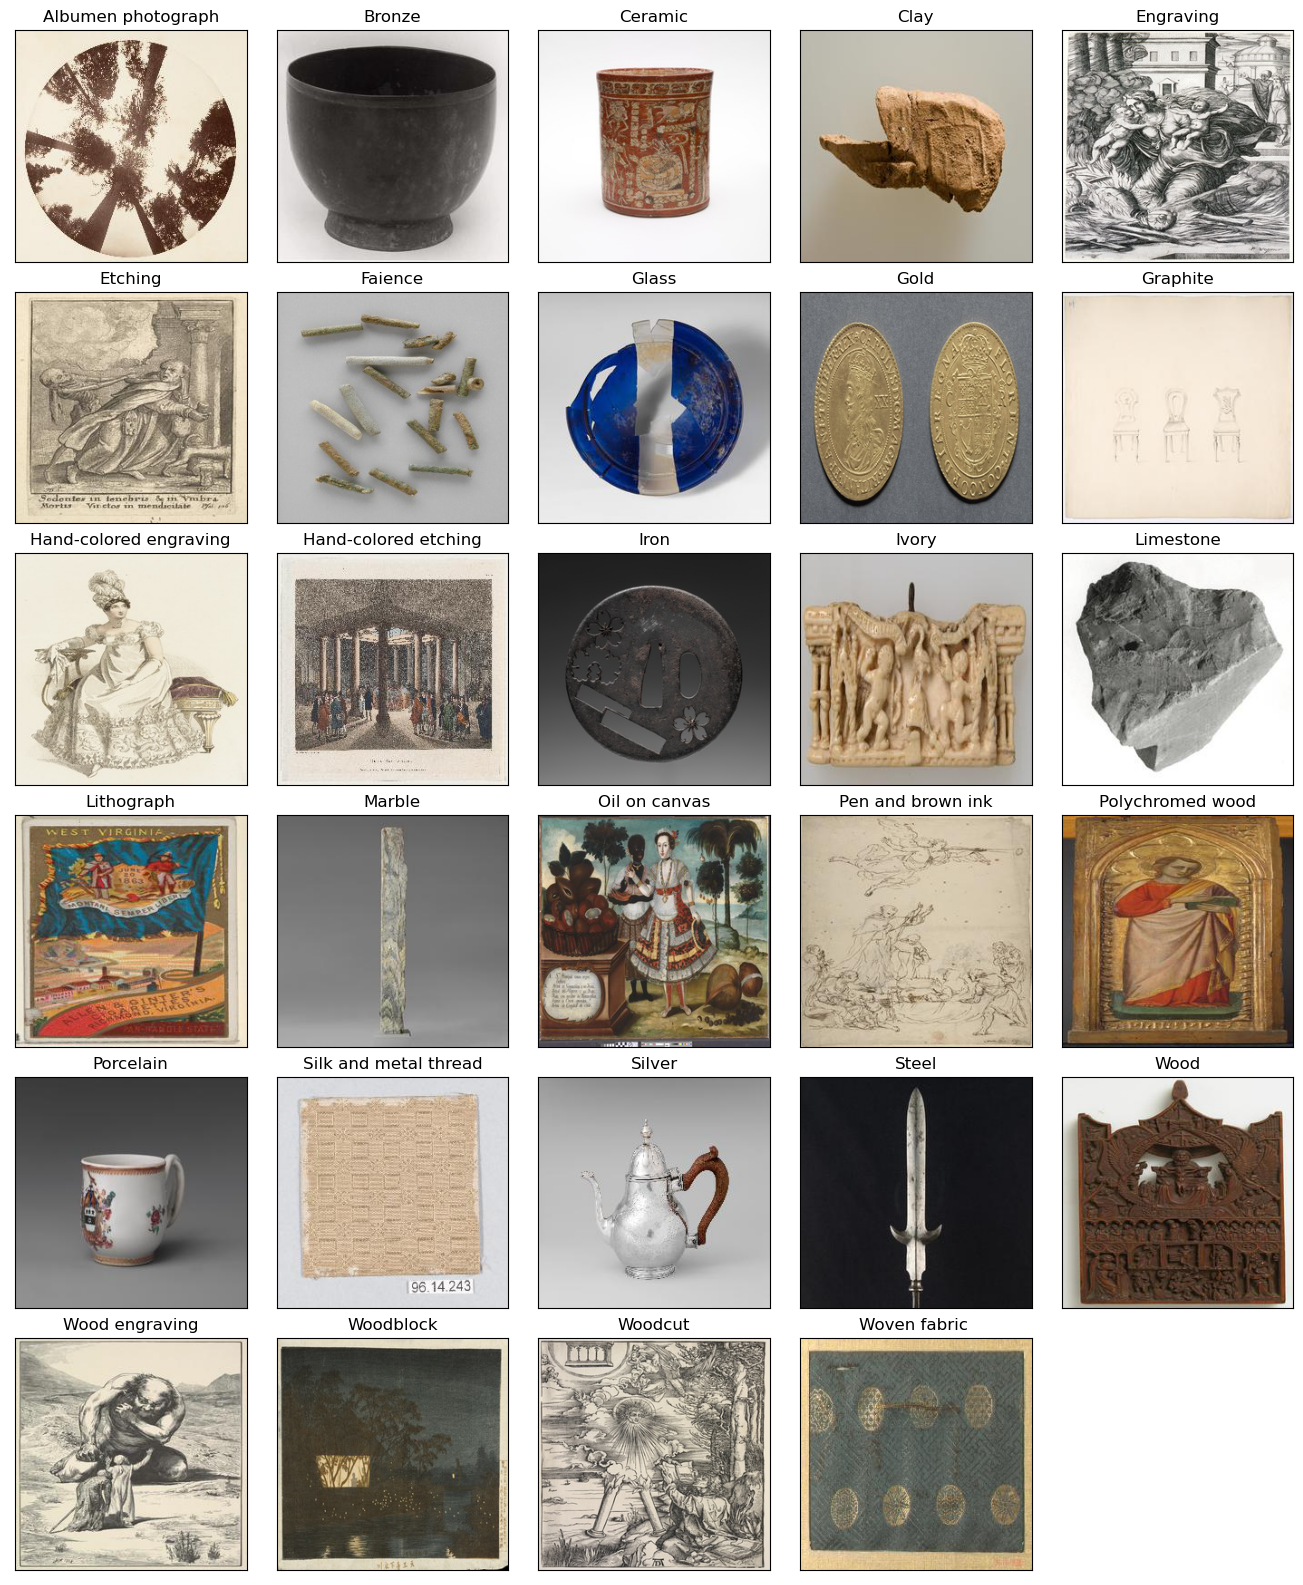

In [17]:
fig = plt.figure(figsize=(20., 20.))
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(6, 5),  # creates 2x2 grid of axes
                 axes_pad=0.3,  # pad between axes in inch.
)

for ax, medium in zip(grid, list(np.unique(metadata_df.Medium))):
    filepath = metadata_df[metadata_df.Medium == medium].sample(1).img_full_path.values[0]
    img = load_img(filepath)
    ax.imshow(img)
    ax.set_title(medium)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

grid[-1].remove()
plt.show()

In [18]:
X_train = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_folder, 'train'),
    seed=123,
)

X_val = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_folder, 'val'),
    seed=123,
)

Found 20300 files belonging to 29 classes.
Found 1450 files belonging to 29 classes.


2022-10-02 18:24:28.983944: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-02 18:24:28.984362: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [19]:
for image_batch, labels_batch in X_train:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

for image_batch, labels_batch in X_val:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)
(32, 256, 256, 3)
(32,)


In [20]:
AUTOTUNE = tf.data.AUTOTUNE
X_train = X_train.cache().prefetch(buffer_size=AUTOTUNE)
X_val = X_val.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [22]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy']
)

In [23]:
model.fit(
  X_train,
  validation_data=X_val,
  epochs=3
)

Epoch 1/3
 28/635 [>.............................] - ETA: 12:20 - loss: 3.4182 - accuracy: 0.0402

KeyboardInterrupt: 